In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [144]:
df=pd.read_csv('train-data.csv')

In [145]:
df.drop('Unnamed: 0',inplace=True,axis=1)


In [146]:
df.drop('New_Price',inplace=True,axis=1)

In [147]:
df.head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,2.35
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,3.50
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,17.50
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,5.20
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,1.95


In [148]:
df.tail(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
6009,Toyota Camry Hybrid,Mumbai,2015,33500,Petrol,Automatic,First,19.16 kmpl,2494 CC,158.2 bhp,5.0,19.75
6010,Honda Brio 1.2 VX MT,Delhi,2013,33746,Petrol,Manual,First,18.5 kmpl,1198 CC,86.8 bhp,5.0,3.20
6011,Skoda Superb 3.6 V6 FSI,Hyderabad,2009,53000,Petrol,Automatic,First,0.0 kmpl,3597 CC,262.6 bhp,5.0,4.75
6012,Toyota Innova 2.5 V Diesel 7-seater,Coimbatore,2011,45004,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,7.0,9.48
6013,Honda Amaze VX i-DTEC,Coimbatore,2015,70602,Diesel,Manual,First,25.8 kmpl,1498 CC,98.6 bhp,5.0,4.83
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65
6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,2.50


In [149]:
df.isna().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [150]:
df['Mileage'] = df['Mileage'].str.extract('(\d+\.\d+|\d+)').astype(float)
df['Engine'] = df['Engine'].str.extract('(\d+\.\d+|\d+)').astype(float)
df['Power'] = df['Power'].str.extract('(\d+\.\d+|\d+)').astype(float)

In [151]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [152]:
df.dropna(inplace=True)

In [153]:
df.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [154]:
df['Fuel_Type'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG'], dtype=object)

In [155]:
# Reshape the data to a column vector
fuel_types = df[['Fuel_Type']]
fuel_types

,Fuel_Type
0,CNG
1,Diesel
2,Petrol
3,Diesel
4,Diesel
...,...
6014,Diesel
6015,Diesel
6016,Diesel
6017,Petrol


In [156]:
df.shape

(5872, 12)

In [157]:
from sklearn.preprocessing import OneHotEncoder

# Reshape the data to a column vector
fuel_types = df[['Fuel_Type']]

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')

# Fit and transform the data
one_hot_encoded = encoder.fit_transform(fuel_types).toarray()

# Convert the one-hot encoded array back to a DataFrame
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['Fuel_Type']))

# Concatenate the one-hot encoded DataFrame with the original DataFrame
df = pd.concat([df, one_hot_df], axis=1)


In [158]:
df.head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
0,Maruti Wagon R LXI CNG,Mumbai,2010.0,72000.0,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,1.0,0.0,0.0,0.0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015.0,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,0.0,1.0,0.0,0.0
2,Honda Jazz V,Chennai,2011.0,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,0.0,0.0,0.0,1.0
3,Maruti Ertiga VDI,Chennai,2012.0,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,0.0,1.0,0.0,0.0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013.0,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,0.0,1.0,0.0,0.0
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012.0,75000.0,LPG,Manual,First,21.10,814.0,55.20,5.0,2.35,0.0,0.0,1.0,0.0
6,Nissan Micra Diesel XV,Jaipur,2013.0,86999.0,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50,0.0,1.0,0.0,0.0
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016.0,36000.0,Diesel,Automatic,First,11.36,2755.0,171.50,8.0,17.50,0.0,1.0,0.0,0.0
8,Volkswagen Vento Diesel Comfortline,Pune,2013.0,64430.0,Diesel,Manual,First,20.54,1598.0,103.60,5.0,5.20,0.0,1.0,0.0,0.0
9,Tata Indica Vista Quadrajet LS,Chennai,2012.0,65932.0,Diesel,Manual,Second,22.30,1248.0,74.00,5.0,1.95,0.0,1.0,0.0,0.0


In [159]:
df.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
0,Maruti Wagon R LXI CNG,Mumbai,2010.0,72000.0,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,1.0,0.0,0.0,0.0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015.0,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,0.0,1.0,0.0,0.0
2,Honda Jazz V,Chennai,2011.0,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,0.0,0.0,0.0,1.0
3,Maruti Ertiga VDI,Chennai,2012.0,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,0.0,1.0,0.0,0.0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013.0,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,0.0,1.0,0.0,0.0


In [160]:
df.drop('Fuel_Type',axis=1,inplace=True)

In [161]:
df.dropna(inplace=True)

In [162]:
df.shape

(5730, 15)

In [163]:
df.tail(10)

,Name,Location,Year,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
5862,Toyota Etios G,Jaipur,2013.0,67000.0,Manual,Second,16.78,1496.0,88.73,5.0,4.05,0.0,0.0,0.0,1.0
5863,Mercedes-Benz GL-Class 2007 2012 350 CDI Luxury,Mumbai,2015.0,48600.0,Automatic,First,12.00,2987.0,224.00,7.0,48.50,0.0,0.0,0.0,1.0
5864,Renault Duster 110PS Diesel RxZ,Bangalore,2014.0,70000.0,Manual,First,19.60,1461.0,108.45,5.0,8.25,0.0,0.0,0.0,1.0
5865,Maruti Swift VDI,Pune,2014.0,84000.0,Manual,First,22.90,1248.0,74.00,5.0,5.25,0.0,1.0,0.0,0.0
5866,Volkswagen Vento Magnific 1.6 Comfortline,Mumbai,2013.0,49106.0,Manual,First,15.04,1598.0,103.20,5.0,4.40,0.0,1.0,0.0,0.0
5867,Skoda Superb L&K 2.0 TDI AT,Mumbai,2017.0,35000.0,Automatic,First,18.19,1968.0,174.50,5.0,25.75,0.0,1.0,0.0,0.0
5868,BMW 3 Series 330d Convertible,Kochi,2014.0,51240.0,Automatic,First,8.20,2993.0,245.00,4.0,29.52,0.0,1.0,0.0,0.0
5869,Maruti Wagon R VXI BS IV,Kolkata,2011.0,37000.0,Manual,Second,18.90,998.0,67.10,5.0,2.10,0.0,1.0,0.0,0.0
5870,Renault KWID RXT,Kochi,2017.0,32587.0,Manual,First,25.17,799.0,53.30,5.0,3.71,0.0,0.0,0.0,1.0
5871,Ford Endeavour 4x2 XLT Limited Edition,Pune,2009.0,180000.0,Manual,First,10.90,2499.0,143.00,7.0,7.50,0.0,1.0,0.0,0.0


In [164]:
df['Transmission']=df['Transmission'].map({'Manual':0,'Automatic':1})

In [165]:
df.head()

,Name,Location,Year,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
0,Maruti Wagon R LXI CNG,Mumbai,2010.0,72000.0,0,First,26.60,998.0,58.16,5.0,1.75,1.0,0.0,0.0,0.0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015.0,41000.0,0,First,19.67,1582.0,126.20,5.0,12.50,0.0,1.0,0.0,0.0
2,Honda Jazz V,Chennai,2011.0,46000.0,0,First,18.20,1199.0,88.70,5.0,4.50,0.0,0.0,0.0,1.0
3,Maruti Ertiga VDI,Chennai,2012.0,87000.0,0,First,20.77,1248.0,88.76,7.0,6.00,0.0,1.0,0.0,0.0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013.0,40670.0,1,Second,15.20,1968.0,140.80,5.0,17.74,0.0,1.0,0.0,0.0


In [166]:
df['Owner_Type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [167]:
df['Owner_Type']=df['Owner_Type'].map({'First':1,'Second':2,'Third':3,'Fourth & Above':4})

In [168]:
df.head()

,Name,Location,Year,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
0,Maruti Wagon R LXI CNG,Mumbai,2010.0,72000.0,0,1,26.60,998.0,58.16,5.0,1.75,1.0,0.0,0.0,0.0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015.0,41000.0,0,1,19.67,1582.0,126.20,5.0,12.50,0.0,1.0,0.0,0.0
2,Honda Jazz V,Chennai,2011.0,46000.0,0,1,18.20,1199.0,88.70,5.0,4.50,0.0,0.0,0.0,1.0
3,Maruti Ertiga VDI,Chennai,2012.0,87000.0,0,1,20.77,1248.0,88.76,7.0,6.00,0.0,1.0,0.0,0.0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013.0,40670.0,1,2,15.20,1968.0,140.80,5.0,17.74,0.0,1.0,0.0,0.0


In [169]:
df.head()

,Name,Location,Year,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
0,Maruti Wagon R LXI CNG,Mumbai,2010.0,72000.0,0,1,26.60,998.0,58.16,5.0,1.75,1.0,0.0,0.0,0.0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015.0,41000.0,0,1,19.67,1582.0,126.20,5.0,12.50,0.0,1.0,0.0,0.0
2,Honda Jazz V,Chennai,2011.0,46000.0,0,1,18.20,1199.0,88.70,5.0,4.50,0.0,0.0,0.0,1.0
3,Maruti Ertiga VDI,Chennai,2012.0,87000.0,0,1,20.77,1248.0,88.76,7.0,6.00,0.0,1.0,0.0,0.0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013.0,40670.0,1,2,15.20,1968.0,140.80,5.0,17.74,0.0,1.0,0.0,0.0


In [170]:
df['Fuel_Type_LPG'].value_counts()

0.0    5720
1.0      10
Name: Fuel_Type_LPG, dtype: int64

In [171]:
df.corr()

C:\Users\prash\AppData\Local\Temp\ipykernel_15748\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Year,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
Year,1.000000,-0.166576,0.083322,-0.385717,0.286537,-0.070809,0.011038,0.007687,0.298725,-0.004507,0.013471,0.006805,-0.013201
Kilometers_Driven,-0.166576,1.000000,-0.023474,0.078869,-0.060658,0.093726,0.034918,0.082999,-0.006014,-0.006505,-0.013659,-0.000136,0.014948
Transmission,0.083322,-0.023474,1.000000,-0.000355,-0.368463,0.500913,0.643807,-0.074325,0.585516,-0.017669,-0.000975,-0.017550,0.005848
Owner_Type,-0.385717,0.078869,-0.000355,1.000000,-0.148113,0.058719,0.025622,0.007193,-0.090220,-0.001208,0.005934,0.000541,-0.005758
Mileage,0.286537,-0.060658,-0.368463,-0.148113,1.000000,-0.639446,-0.540614,-0.333059,-0.343867,0.003598,0.000186,0.004463,-0.001252
Engine,-0.070809,0.093726,0.500913,0.058719,-0.639446,1.000000,0.866196,0.405776,0.657555,-0.011989,-0.006726,-0.010816,0.009952
Power,0.011038,0.034918,0.643807,0.025622,-0.540614,0.866196,1.000000,0.106868,0.770939,-0.008545,-0.008269,-0.014292,0.011127
Seats,0.007687,0.082999,-0.074325,0.007193,-0.333059,0.405776,0.106868,1.000000,0.063605,-0.006738,0.013091,-0.004292,-0.011459
Price,0.298725,-0.006014,0.585516,-0.090220,-0.343867,0.657555,0.770939,0.063605,1.000000,0.002890,-0.007836,-0.007227,0.007901
Fuel_Type_CNG,-0.004507,-0.006505,-0.017669,-0.001208,0.003598,-0.011989,-0.008545,-0.006738,0.002890,1.000000,-0.104204,-0.004040,-0.087630


In [172]:
df.drop(['Name','Location','Fuel_Type_LPG'],axis=1,inplace=True)

<Axes: ylabel='Density'>

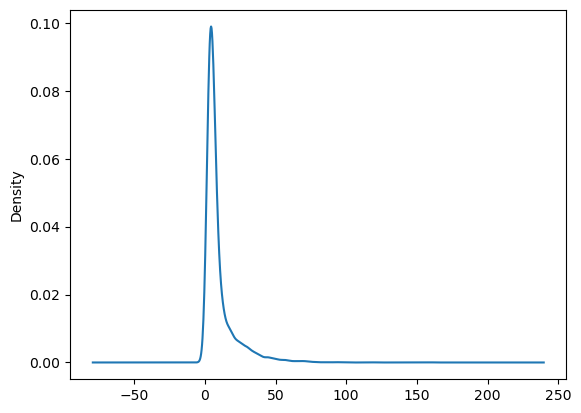

In [173]:
df.Price.plot(kind='kde')

In [174]:
df.Price.min()

0.44

In [175]:
df.Price.max()

160.0

In [176]:
df['Price'].describe()

count    5730.000000
mean        9.611885
std        11.235364
min         0.440000
25%         3.542500
50%         5.745000
75%        10.037500
max       160.000000
Name: Price, dtype: float64

In [177]:
X=df[df.columns.drop('Price')]
Y=df['Price']

In [178]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [179]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sc=StandardScaler()
cols=X.columns
X[cols]=sc.fit_transform(X[cols])
X.head()

C:\Users\prash\AppData\Local\Temp\ipykernel_15748\417149615.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[cols]=sc.fit_transform(X[cols])


,Year,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,-1.105661,0.146245,-0.639995,-0.436472,1.911581,-1.043613,-1.024710,-0.351917,10.349551,-1.078462,-0.906928
1,0.479863,-0.186512,-0.639995,-0.436472,0.317848,-0.071203,0.241151,-0.351917,-0.096623,0.927246,-0.906928
2,-0.788556,-0.132842,-0.639995,-0.436472,-0.020217,-0.708930,-0.456524,-0.351917,-0.096623,-1.078462,1.102623
3,-0.471451,0.307256,-0.639995,-0.436472,0.570821,-0.627341,-0.455407,2.140645,-0.096623,0.927246,-0.906928
4,-0.154346,-0.190055,1.562511,1.810594,-0.710144,0.571520,0.512779,-0.351917,-0.096623,0.927246,-0.906928


In [180]:
model.fit(X,Y)

LinearRegression()

In [181]:
model.intercept_

9.611884816754023

In [182]:
model.coef_

array([ 3.32392480e+00,  1.90891467e-01,  1.31191190e+00,  5.86749948e-05,
       -7.24675269e-03,  1.54916887e+00,  6.48743373e+00, -5.52060515e-01,
        8.04919956e-02, -3.41104511e-01, -2.98395637e-01])

In [183]:
model.score(X,Y)

0.6896628478518416

In [184]:
import statsmodels.api as sm
X_sm=sm.add_constant(X)
sm_model=sm.OLS(Y,X_sm).fit()

In [185]:
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     1155.
Date:                Sun, 24 Dec 2023   Prob (F-statistic):               0.00
Time:                        12:23:51   Log-Likelihood:                -18639.
No. Observations:                5730   AIC:                         3.730e+04
Df Residuals:                    5718   BIC:                         3.738e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 9.6119      0.08

In [186]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [187]:
vif=pd.DataFrame()
X_t=X
vif['Features']=X_t.columns
vif['VIF']=[variance_inflation_factor(X_t.values,i) for i in range (X_t.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif


,Features,VIF
9,Fuel_Type_Diesel,142.98
10,Fuel_Type_Petrol,142.52
5,Engine,7.36
6,Power,6.71
8,Fuel_Type_CNG,6.24
4,Mileage,1.98
2,Transmission,1.84
7,Seats,1.80
0,Year,1.40
3,Owner_Type,1.18


In [188]:
cols2=['Engine','Power','Transmission','Seats','Year','Kilometers_Driven']

In [189]:
X2=X[cols2]
X2_sm=sm.add_constant(X2)
X2sm_model=sm.OLS(Y,X2_sm).fit()
print(X2sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     2118.
Date:                Sun, 24 Dec 2023   Prob (F-statistic):               0.00
Time:                        12:23:51   Log-Likelihood:                -18641.
No. Observations:                5730   AIC:                         3.730e+04
Df Residuals:                    5723   BIC:                         3.734e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 9.6119      0.08

In [190]:
vif=pd.DataFrame()
X_t=X2
vif['Features']=X_t.columns
vif['VIF']=[variance_inflation_factor(X_t.values,i) for i in range (X_t.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif


,Features,VIF
0,Engine,6.99
1,Power,6.70
2,Transmission,1.79
3,Seats,1.75
4,Year,1.08
5,Kilometers_Driven,1.04


In [191]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X2,Y,test_size=.1,random_state=1)

In [192]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(5157, 6) (573, 6) (5157,) (573,)


In [193]:
final_model=LinearRegression()
final_model.fit(x_train,y_train)

LinearRegression()

In [194]:
final_model.score(x_train,y_train)

0.6915476796597291

In [195]:
y_pred=final_model.predict(x_test)

In [196]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
print(mean_absolute_error(y_pred,y_test))
print(mean_squared_error(y_pred,y_test))
print(mean_absolute_percentage_error(y_pred,y_test))
print(np.sqrt(mean_squared_error(y_pred,y_test)))

3.781965302065396
37.866713043657704
1.5753686932928541
6.1535935065340235


In [197]:
pred=final_model.predict(x_train)

In [198]:
errors=pred-y_train

C:\Users\prash\AppData\Local\Temp\ipykernel_15748\2392254718.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors)


<Axes: xlabel='Price', ylabel='Density'>

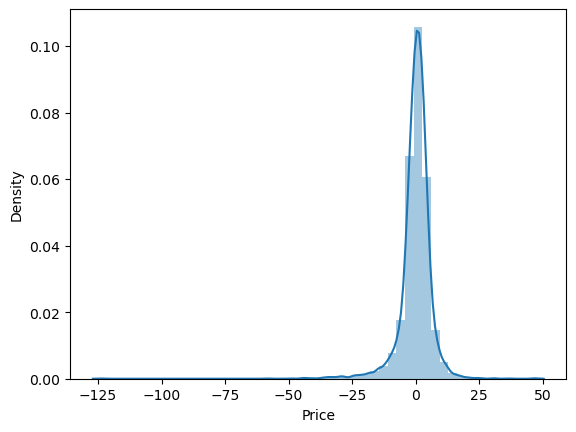

In [199]:
sns.distplot(errors)

Text(0.5, 0, 'errors')

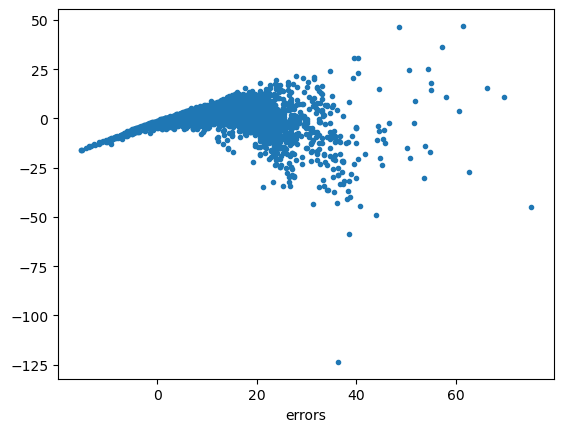

In [200]:
plt.scatter(pred,errors,marker='.')
plt.xlabel('predicted values')
plt.xlabel('errors')

C:\Users\prash\AppData\Local\Temp\ipykernel_15748\834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

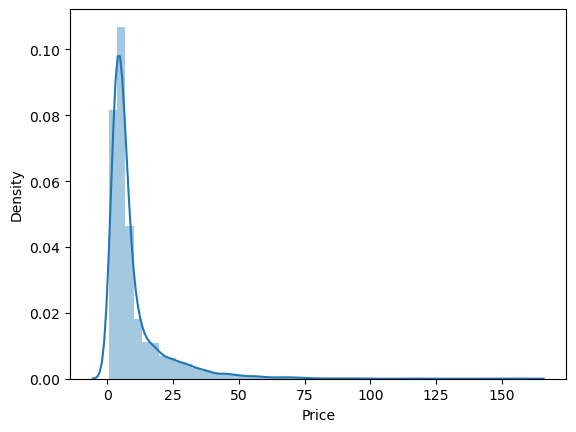

In [201]:
sns.distplot(df['Price'])

In [202]:
df['Price'].describe()

count    5730.000000
mean        9.611885
std        11.235364
min         0.440000
25%         3.542500
50%         5.745000
75%        10.037500
max       160.000000
Name: Price, dtype: float64

In [203]:
df.sort_values(by='Price',inplace=True)

In [214]:
Q1=3.542500
Q3=10.037500
IQR=Q3-Q1
lb=Q1-1.5*IQR
ub=Q3+1.5*IQR
print(ub,lb)

19.78 -6.199999999999999


In [224]:
data=df[(df['Price']<=ub)]
data.head(10)


,Year,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
1713,2011.0,65000.0,0,2,26.0,624.0,35.0,4.0,0.44,0.0,1.0,0.0
1628,2004.0,12000.0,0,2,16.1,796.0,37.0,4.0,0.45,0.0,0.0,1.0
3138,1998.0,95150.0,0,3,17.3,993.0,60.0,5.0,0.45,0.0,1.0,0.0
2847,2005.0,86000.0,0,2,15.3,1341.0,83.0,5.0,0.45,0.0,0.0,1.0
2605,2010.0,57000.0,0,1,26.0,624.0,35.0,4.0,0.50,0.0,0.0,1.0
3228,2003.0,52000.0,0,1,16.1,796.0,37.0,4.0,0.50,0.0,1.0,0.0
5657,2002.0,75000.0,0,1,16.1,796.0,37.0,4.0,0.51,0.0,1.0,0.0
4965,2012.0,80000.0,0,2,25.4,624.0,37.5,4.0,0.53,0.0,1.0,0.0
5716,1998.0,95150.0,0,3,17.3,993.0,60.0,5.0,0.53,0.0,0.0,1.0
274,2002.0,60000.0,0,3,17.3,993.0,60.0,5.0,0.55,0.0,0.0,1.0


In [225]:
print(data['Price'].max())

19.75


C:\Users\prash\AppData\Local\Temp\ipykernel_15748\4244922584.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Price)


<Axes: xlabel='Price', ylabel='Density'>

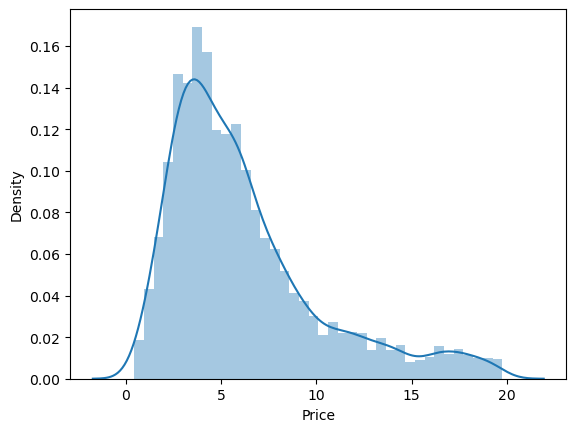

In [215]:
sns.distplot(data.Price)

In [226]:
Xf=data[cols2]
Yf=data['Price']

In [227]:
Xf.shape

(5035, 6)

In [228]:
sc=StandardScaler()
cols2=Xf.columns
Xf[cols2]=sc.fit_transform(Xf[cols2])

C:\Users\prash\AppData\Local\Temp\ipykernel_15748\2757428730.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xf[cols2]=sc.fit_transform(Xf[cols2])


In [229]:
Xf.shape

(5035, 6)

In [230]:
x_train,x_test,y_train,y_test=train_test_split(Xf,Yf,test_size=.1,random_state=1)

In [231]:
final=LinearRegression()
final.fit(x_train,y_train)

LinearRegression()

In [232]:
final.score(x_train,y_train)

0.7023507304818071

In [233]:
y_pred=final.predict(x_test)

In [234]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
print(mean_absolute_error(y_pred,y_test))
print(mean_squared_error(y_pred,y_test))
print(mean_absolute_percentage_error(y_pred,y_test))
print(np.sqrt(mean_squared_error(y_pred,y_test)))

1.5310236548991003
4.386292567436869
0.37836619160845664
2.094347766593903


In [236]:
pred=final_model.predict(x_train)

In [237]:
errors=pred-y_train

C:\Users\prash\AppData\Local\Temp\ipykernel_15748\2392254718.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors)


<Axes: xlabel='Price', ylabel='Density'>

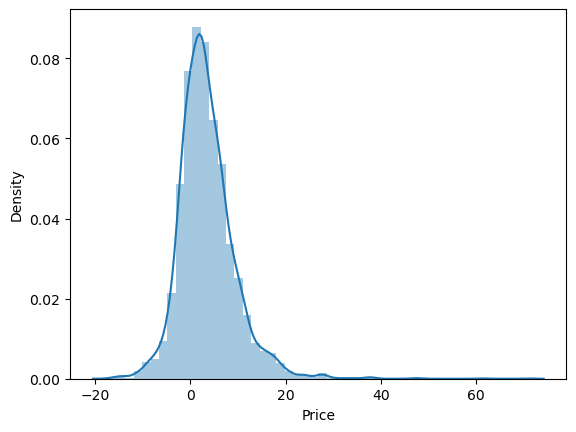

In [238]:
sns.distplot(errors)

Text(0.5, 0, 'errors')

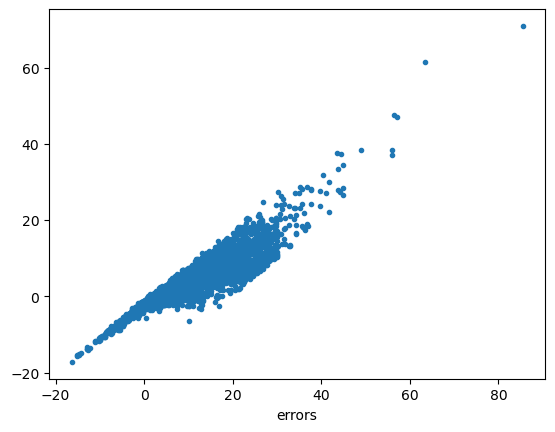

In [239]:
plt.scatter(pred,errors,marker='.')
plt.xlabel('predicted values')
plt.xlabel('errors')

In [240]:
y_train=np.log(y_train)
y_test=np.log(y_test)

C:\Users\prash\AppData\Local\Temp\ipykernel_15748\375460187.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train)


<Axes: xlabel='Price', ylabel='Density'>

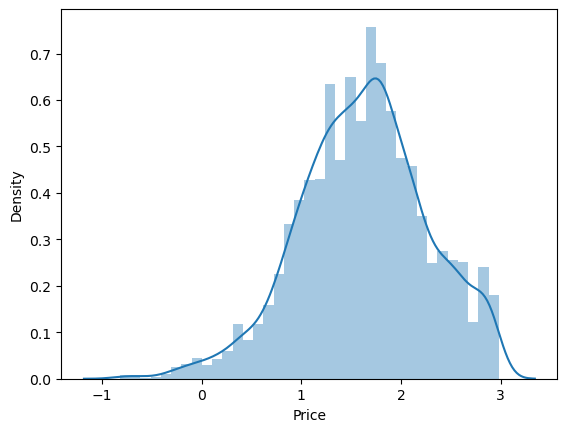

In [241]:
sns.distplot(y_train)

In [242]:
final2=LinearRegression()

In [243]:
final2.fit(x_train,y_train)

LinearRegression()

In [244]:
final2.score(x_train,y_train)

0.7905394797197605

In [245]:
y_pred=final2.predict(x_test)

In [246]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
print(mean_absolute_error(y_pred,y_test))
print(mean_squared_error(y_pred,y_test))
print(mean_absolute_percentage_error(y_pred,y_test))
print(np.sqrt(mean_squared_error(y_pred,y_test)))

0.22817483115274087
0.0825622503654268
0.2213667559723589
0.28733647587006217


C:\Users\prash\AppData\Local\Temp\ipykernel_15748\3143752357.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors)


<Axes: xlabel='Price', ylabel='Density'>

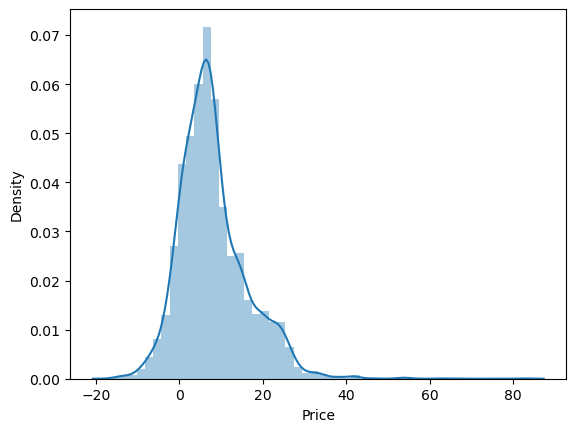

In [247]:
pred=final_model.predict(x_train)
errors=pred-y_train
sns.distplot(errors)

Text(0.5, 0, 'errors')

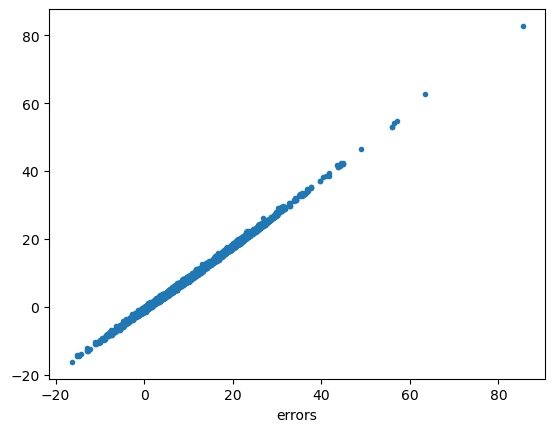

In [248]:
plt.scatter(pred,errors,marker='.')
plt.xlabel('predicted values')
plt.xlabel('errors')